# Global Birth Rate Prediction: Analyzing World Data

Ajibola-Elias, Maryam

Erden, Zehra Betul

Wells, Thao

## Data Preprocessing

In [ ]:
#adding necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

/home/erdenzehra/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
#loading the dataset
df = pd.read_csv("worlddata.csv")
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [ ]:
#checking data types of each column/feature
df.dtypes

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

Some variables are in object format including symbols like '%' and '$' while being numerical data.

In [ ]:
#preprocessing the data type inconsistencies
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
                      'Out of pocket health expenditure', 'Physicians per thousand',
                      'Population', 'Population: Labor force participation (%)',
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace('%','').replace(',', '').replace('$','')))

/tmp/ipykernel_2224/2995062732.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace('%','').replace(',', '').replace('$','')))


There some categorical columns that are not important for our task and data understanding.
 > Abbreviation, Calling Code, Capital/Major City, Currency-Code, Largest city, Official language, Latitude, Longitude

In [ ]:
#drop unnecessary columns
df = df.drop(['Abbreviation', 'Calling Code', 'Capital/Major City', 'Currency-Code', 'Largest city', 'Official language', 'Latitude', 'Longitude'], axis=1)

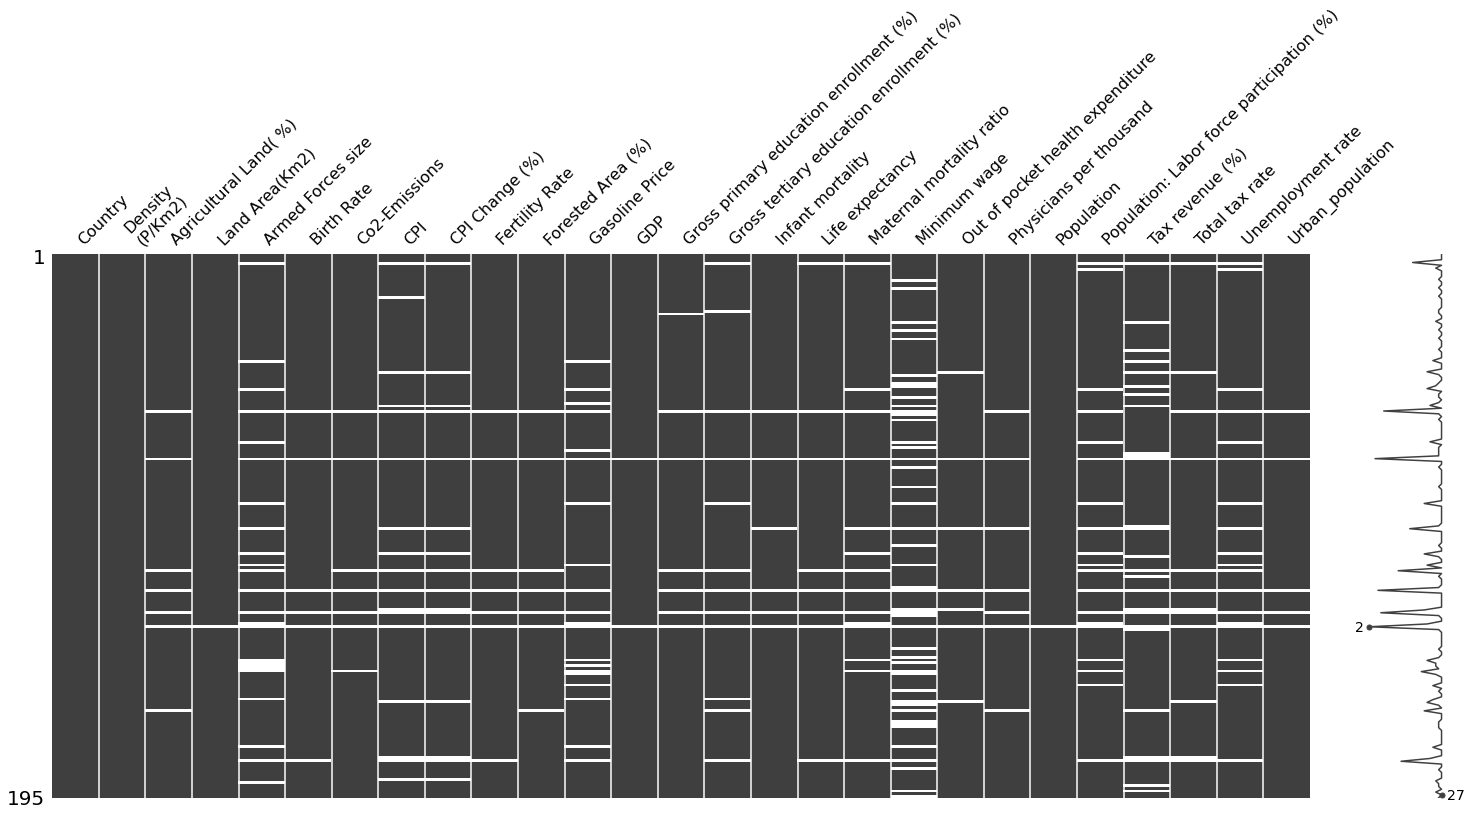

In [ ]:
#missing value check
missing_values = df.isnull().sum()
ms.matrix(df)
plt.show()

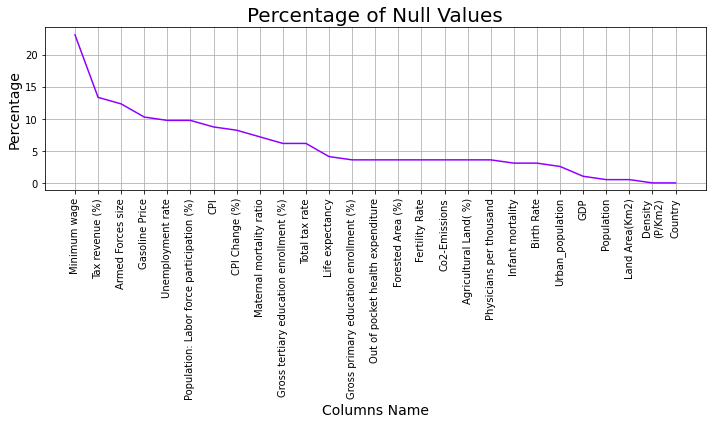

In [ ]:
#displaying the null value percentage by column
null_percentage = (missing_values / len(df)) * 100
null_percentage = null_percentage.round(2)

sorted_null_percentage = null_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(sorted_null_percentage.index, sorted_null_percentage.values, color='#8F00FF')

plt.title('Percentage of Null Values', fontsize=20)
plt.xlabel('Columns Name', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.grid(True)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The missing value percentages are not too high to get rid of any column. However, it is essential to consider the missingness pattern and the potential impact of missing values on the analysis and interpretation of the data.

To deal with the missing values we need to check the distribution of each column/feature.

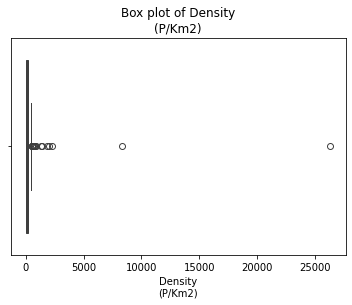

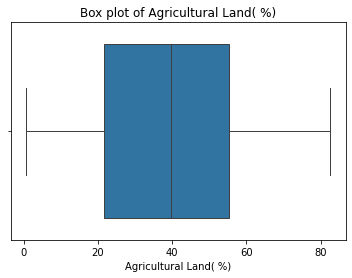

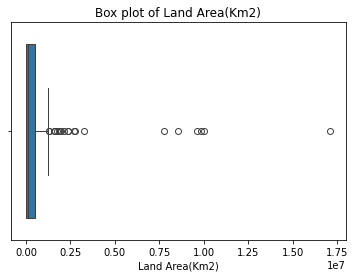

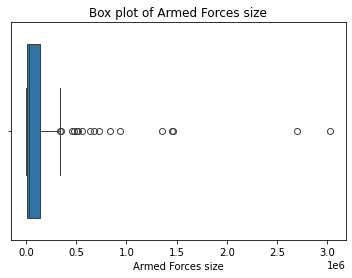

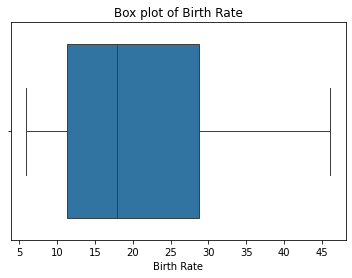

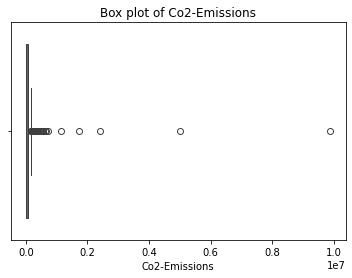

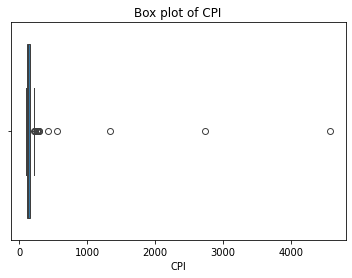

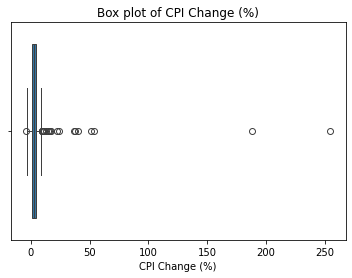

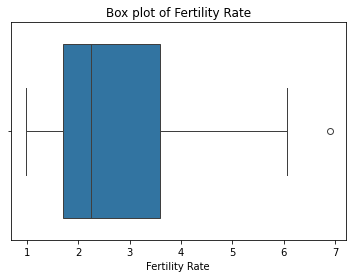

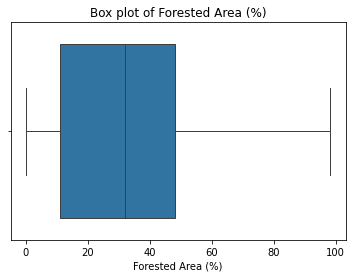

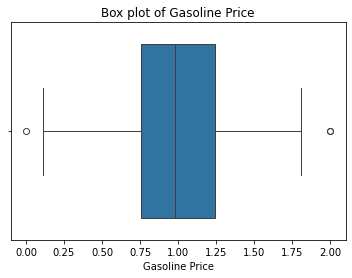

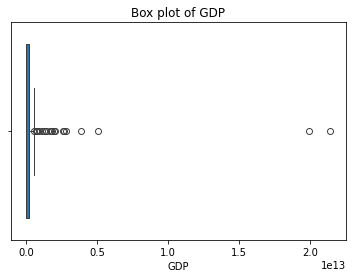

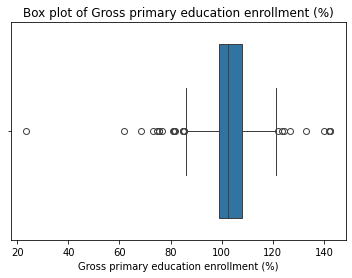

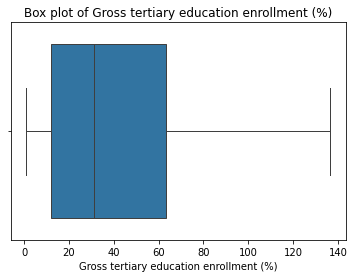

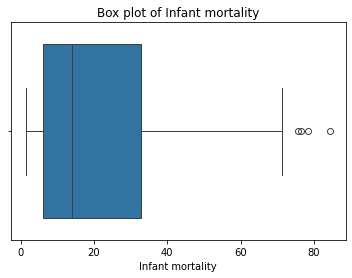

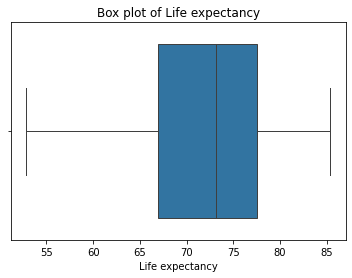

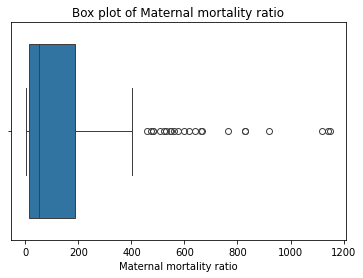

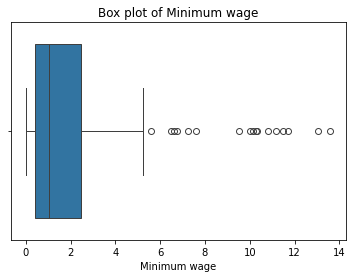

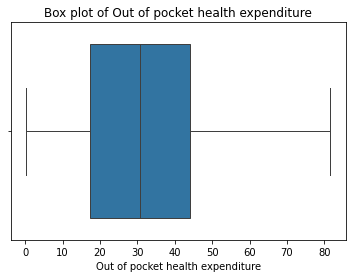

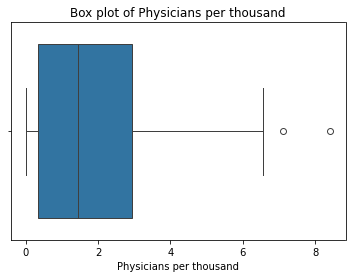

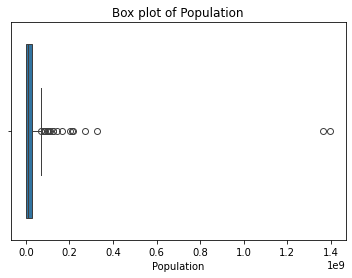

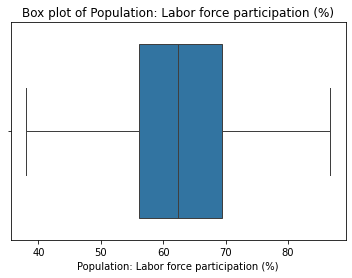

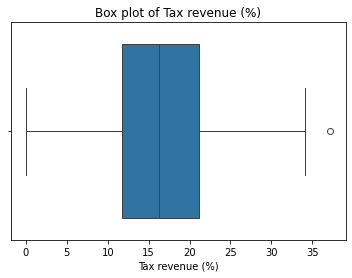

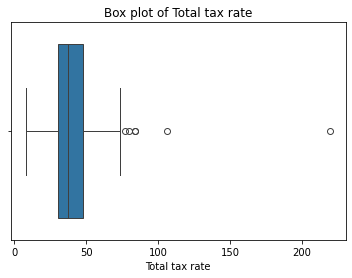

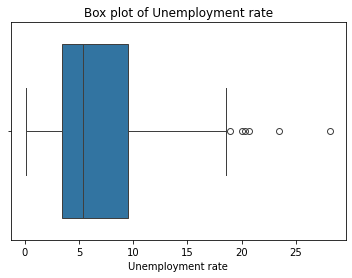

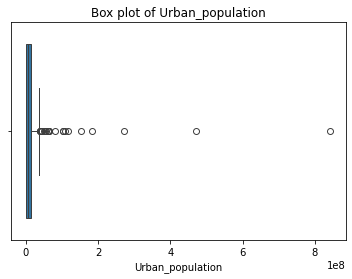

In [ ]:
#exluding the non-numeric columns which is only the 'Country' column
numeric_df = df.select_dtypes(include=[np.number])

#boxplot for displaying outliers and distribition of each feature
for col in numeric_df:
  sns.boxplot(x=df[col])
  plt.title(f'Box plot of {col}')
  plt.show()

There are normally distributed features along with very skewed ones. To deal with the missing values, we will perform median imputation to skewed distributions while imputing mean values to normally distributed columns.

There are also many outliers. For our model choices, tree models are not highly affected by outliers so we will keep them. For linear regression we will perform robust scaling later to decrease the effect of outliers to the model performance.

In [ ]:
#handling missing values - mean imputation
for column in numeric_df:
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)

In [ ]:
# checking duplicated records
duplicates = df.duplicated().sum()
print('Number of Duplicated Entries: ',duplicates)

Number of Duplicated Entries:  0


In [ ]:
df

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60.0,58.1,652230.0,323000.000000,32.49,8672.0,149.900000,2.300000,4.47,...,638.000000,0.430000,78.4,0.28,38041754.0,48.900000,9.300000,71.400000,11.120000,9797273.0
1,Albania,105.0,43.1,28748.0,9000.000000,11.78,4536.0,119.050000,1.400000,1.62,...,15.000000,1.120000,56.9,1.20,2854191.0,55.700000,18.600000,36.600000,12.330000,1747593.0
2,Algeria,18.0,17.4,2381741.0,317000.000000,24.28,150006.0,151.360000,2.000000,3.02,...,112.000000,0.950000,28.1,1.72,43053054.0,41.200000,37.200000,66.100000,11.700000,31510100.0
3,Andorra,164.0,40.0,468.0,159274.853801,7.20,469.0,190.460955,6.722346,1.27,...,160.392265,6.630000,36.4,3.33,77142.0,62.738068,16.573964,40.822404,6.886364,67873.0
4,Angola,26.0,47.5,1246700.0,117000.000000,40.73,34693.0,261.730000,17.100000,5.52,...,241.000000,0.710000,33.4,0.21,31825295.0,77.500000,9.200000,49.100000,6.890000,21061025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,24.5,912050.0,343000.000000,17.88,164175.0,2740.270000,254.900000,2.27,...,125.000000,0.010000,45.8,1.92,28515829.0,59.700000,16.573964,73.300000,8.800000,25162368.0
191,Vietnam,314.0,39.3,331210.0,522000.000000,16.75,192668.0,163.520000,2.800000,2.05,...,43.000000,0.730000,43.5,0.82,96462106.0,77.400000,19.100000,37.600000,2.010000,35332140.0
192,Yemen,56.0,44.6,527968.0,40000.000000,30.45,10609.0,157.580000,8.100000,3.79,...,164.000000,2.194133,81.0,0.31,29161922.0,38.000000,16.573964,26.600000,12.910000,10869523.0
193,Zambia,25.0,32.1,752618.0,16000.000000,36.19,5141.0,212.310000,9.200000,4.63,...,213.000000,0.240000,27.5,1.19,17861030.0,74.600000,16.200000,15.600000,11.430000,7871713.0


## Data Understanding

Average values of each feature for overall data.

In [ ]:
df.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
count,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,1.950000e+02
mean,356.764103,39.117553,6.896244e+05,1.592749e+05,20.214974,1.777992e+05,190.460955,6.722346,2.698138,32.015426,...,160.392265,2.194133,32.637234,1.839840,3.938116e+07,62.738068,16.573964,40.822404,6.886364,2.230454e+07
std,1982.888967,21.386448,1.916650e+06,3.563077e+05,9.790765,8.235184e+05,380.111858,23.420457,1.258921,23.358162,...,224.918945,2.603545,18.823620,1.653596,1.447180e+08,9.975339,6.478356,19.911710,4.824084,7.445211e+07
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.100000e+01,99.030000,-4.300000,0.980000,0.000000,...,2.000000,0.010000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03
25%,35.500000,22.650000,2.445650e+04,1.250000e+04,11.450000,2.625500e+03,114.470000,1.050000,1.710000,11.450000,...,16.500000,0.530000,17.700000,0.360000,2.004434e+06,57.250000,12.550000,30.900000,3.590000,1.218046e+06
50%,89.000000,39.200000,1.205380e+05,4.200000e+04,18.250000,1.659000e+04,129.780000,2.600000,2.270000,32.015426,...,67.000000,1.570000,32.100000,1.570000,8.877067e+06,62.738068,16.573964,37.900000,5.920000,4.717305e+06
75%,216.500000,54.850000,5.541675e+05,1.592749e+05,28.445000,8.881650e+04,179.485000,5.800000,3.565000,47.450000,...,175.000000,2.194133,43.750000,2.875000,2.888532e+07,68.300000,20.300000,47.300000,8.840000,1.664211e+07
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,4583.710000,254.900000,6.910000,98.300000,...,1150.000000,13.590000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08


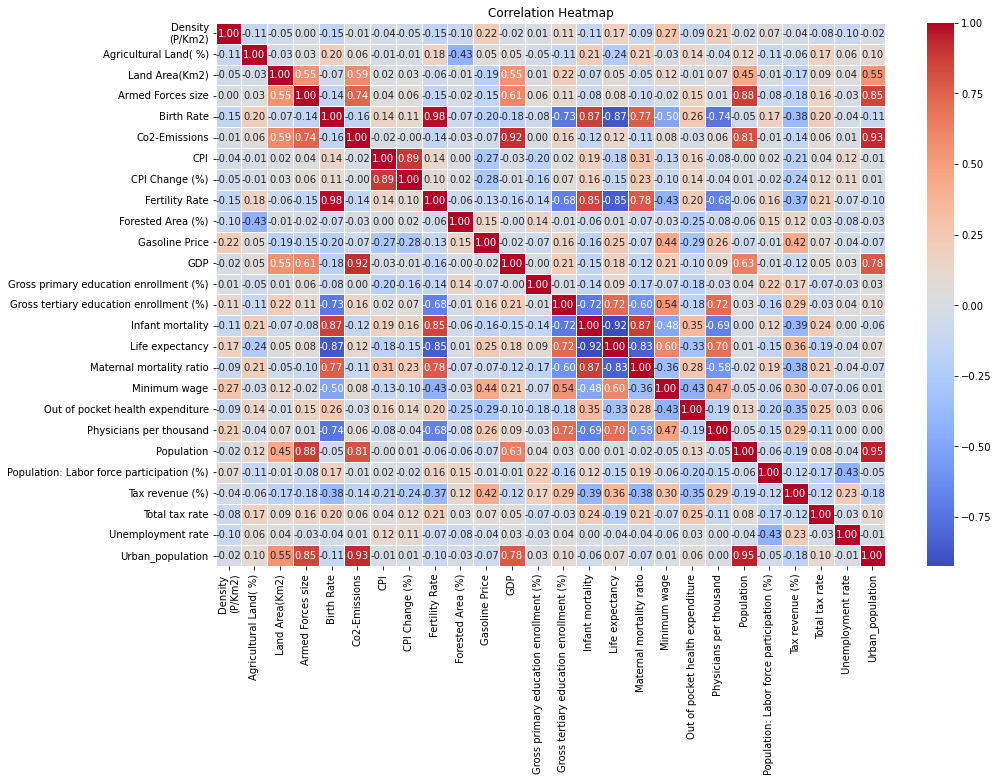

In [ ]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

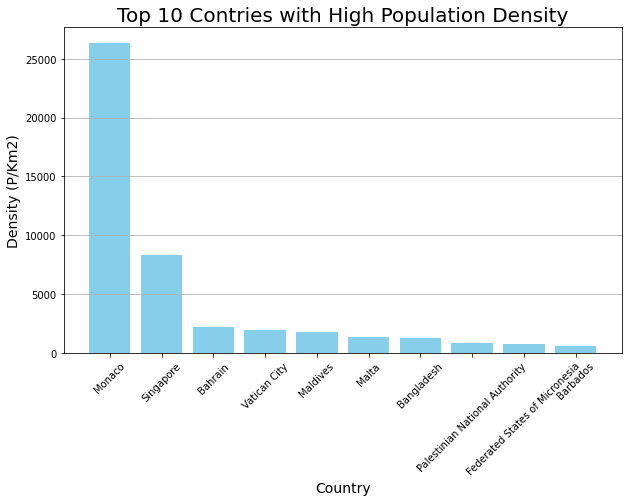

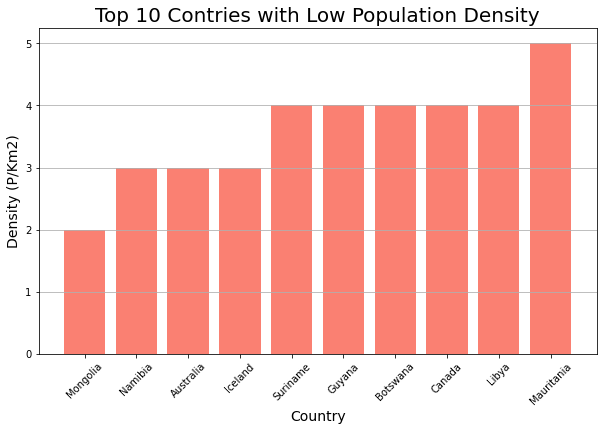

In [ ]:
#displaying population density insights

density_country = df.groupby('Country')['Density\n(P/Km2)'].mean().reset_index()

top_10_high_density_countries = density_country.sort_values(by='Density\n(P/Km2)', ascending=False).head(10)
top_10_low_density_countries = density_country.sort_values(by='Density\n(P/Km2)', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_high_density_countries['Country'], top_10_high_density_countries['Density\n(P/Km2)'], color='skyblue')
plt.title('Top 10 Contries with High Population Density', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Density (P/Km2)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(top_10_low_density_countries['Country'], top_10_low_density_countries['Density\n(P/Km2)'], color='salmon')
plt.title('Top 10 Contries with Low Population Density', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Density (P/Km2)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

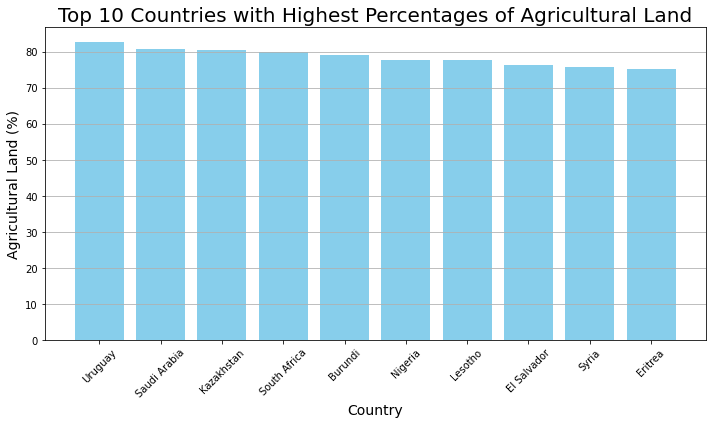

In [ ]:
#displaying agricultural land insights
agricultural = df.sort_values(by=['Agricultural Land( %)'], ascending=False)
top_countries_agr = agricultural.head(10)[['Country', 'Agricultural Land( %)']]

plt.figure(figsize=(10, 6))
plt.bar(top_countries_agr['Country'], top_countries_agr['Agricultural Land( %)'], color='skyblue')
plt.title('Top 10 Countries with Highest Percentages of Agricultural Land', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Agricultural Land (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

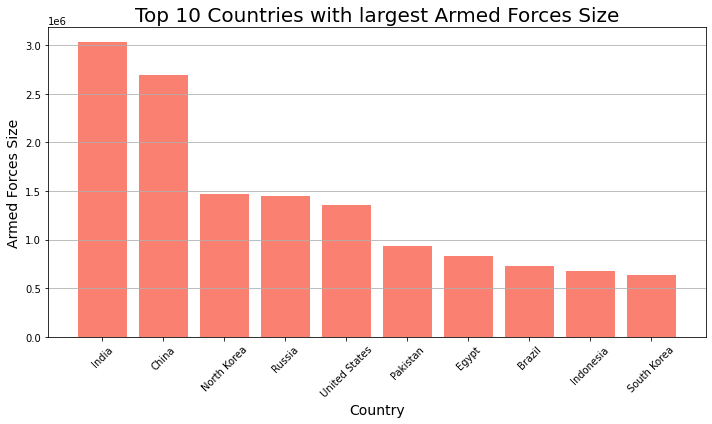

In [ ]:
#armed forces size
armed = df.sort_values(by='Armed Forces size', ascending=False)
top_10_armed_forces = armed.head(10)[['Country', 'Armed Forces size']]

plt.figure(figsize=(10, 6))
plt.bar(top_10_armed_forces['Country'], top_10_armed_forces['Armed Forces size'], color='salmon')
plt.title('Top 10 Countries with largest Armed Forces Size', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Armed Forces Size', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

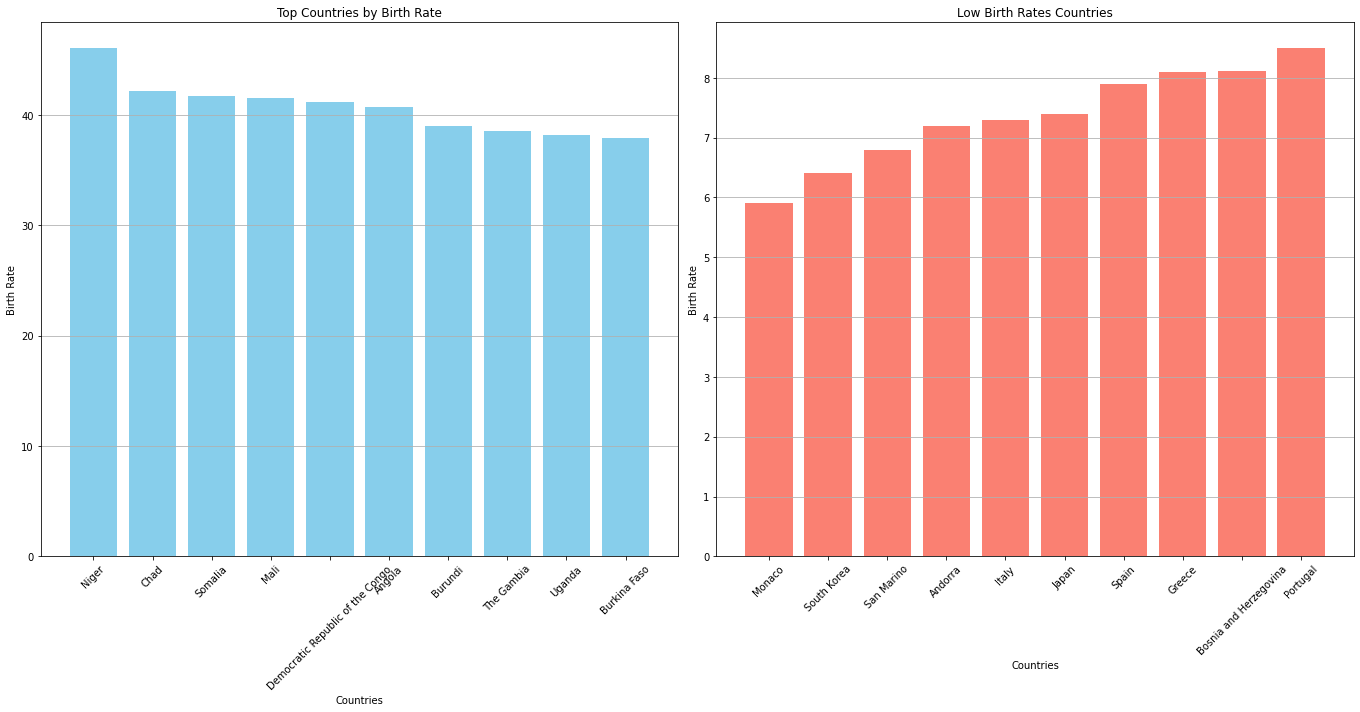

In [ ]:
#birth rate insights

birth_rate_high = df.sort_values('Birth Rate',ascending=False)
birth_rate_high_countries = birth_rate_high.head(10)[['Country','Birth Rate']]

birth_rate_low = df.sort_values('Birth Rate',ascending=True)
birth_rate_low_countries = birth_rate_low.head(10)[['Country','Birth Rate']]

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(19, 10))

axis[0].bar(birth_rate_high_countries['Country'], birth_rate_high_countries['Birth Rate'], color='skyblue')
axis[0].set_title('Top Countries by Birth Rate')
axis[0].set_xlabel('Countries')
axis[0].set_ylabel('Birth Rate')
axis[0].tick_params(axis='x', rotation=45)
axis[0].grid(axis='y')

axis[1].bar(birth_rate_low_countries['Country'], birth_rate_low_countries['Birth Rate'], color='salmon')
axis[1].set_title('Low Birth Rates Countries')
axis[1].set_xlabel('Countries')
axis[1].set_ylabel('Birth Rate')
axis[1].tick_params(axis='x', rotation=45)
axis[1].grid(axis='y')

plt.tight_layout()
plt.show()

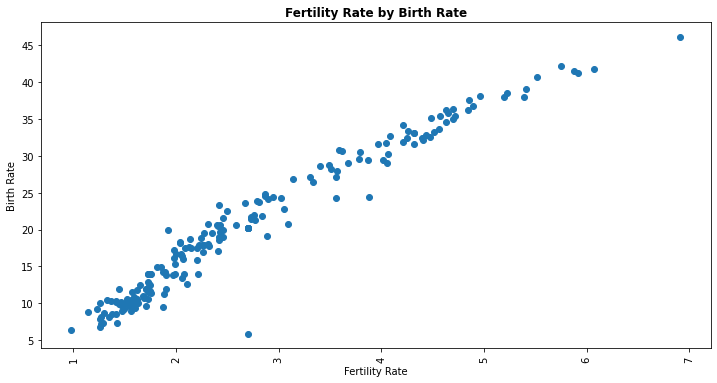

In [ ]:
###Checking for feature that might be linked to birth rate- i.e feritly rate
birth_stuff = df[['Fertility Rate', 'Birth Rate']]

plt.figure(figsize=(12, 6))
plt.scatter(df['Fertility Rate'], df['Birth Rate'])
plt.xticks(rotation=90)
plt.xlabel('Fertility Rate')
plt.ylabel('Birth Rate')
plt.title('Fertility Rate by Birth Rate', fontweight='bold')
plt.show()

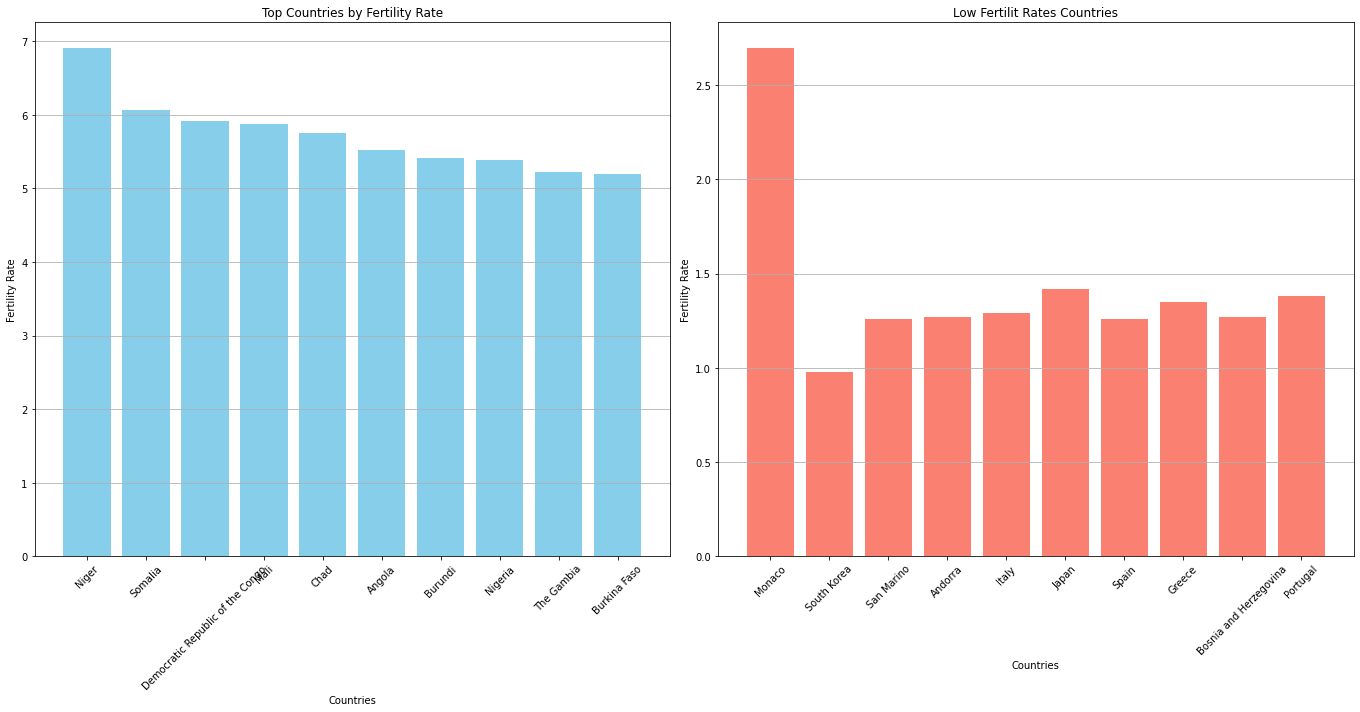

In [ ]:
# birth rate insights: fertility rates v. countries

fertility_rate_high = df.sort_values('Fertility Rate',ascending=False)
fertility_rate_high_countries = fertility_rate_high.head(10)[['Country','Fertility Rate']]

fertility_rate_low = df.sort_values('Birth Rate',ascending=True)
fertility_rate_low_countries = fertility_rate_low.head(10)[['Country','Fertility Rate']]

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(19, 10))

axis[0].bar(fertility_rate_high_countries['Country'], fertility_rate_high_countries['Fertility Rate'], color='skyblue')
axis[0].set_title('Top Countries by Fertility Rate')
axis[0].set_xlabel('Countries')
axis[0].set_ylabel('Fertility Rate')
axis[0].tick_params(axis='x', rotation=45)
axis[0].grid(axis='y')

axis[1].bar(fertility_rate_low_countries['Country'], fertility_rate_low_countries['Fertility Rate'], color='salmon')
axis[1].set_title('Low Fertilit Rates Countries')
axis[1].set_xlabel('Countries')
axis[1].set_ylabel('Fertility Rate')
axis[1].tick_params(axis='x', rotation=45)
axis[1].grid(axis='y')

plt.tight_layout()
plt.show()

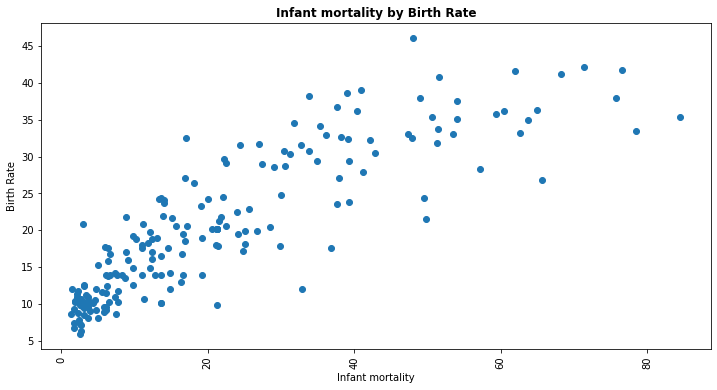

In [ ]:
###Checking for feature that might be linked to birth rate- i.e feritly rate
birth_stuff = df[['Infant mortality', 'Birth Rate']]

plt.figure(figsize=(12, 6))
plt.scatter(df['Infant mortality'], df['Birth Rate'])
plt.xticks(rotation=90)
plt.xlabel('Infant mortality')
plt.ylabel('Birth Rate')
plt.title('Infant mortality by Birth Rate', fontweight='bold')
plt.show()

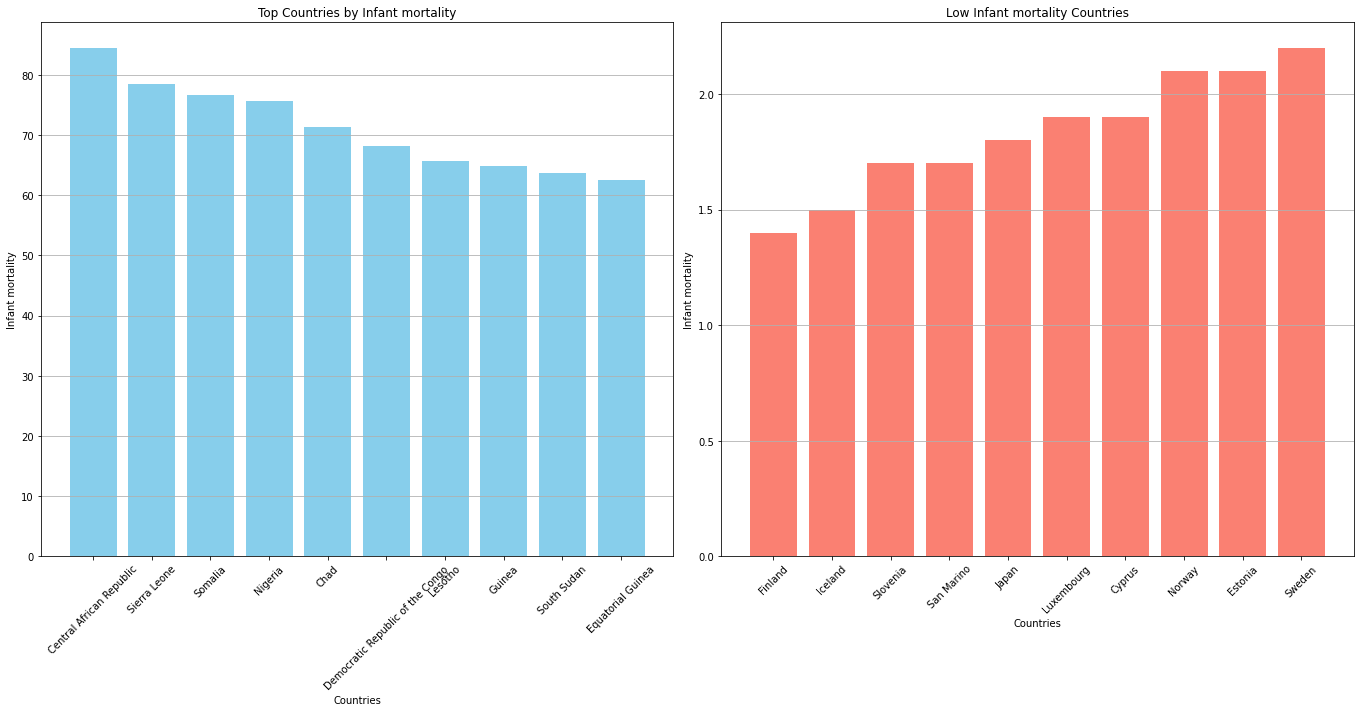

In [ ]:
# Infant mortality
Infantm_high = df.sort_values('Infant mortality',ascending=False)
Infantm_high_countries = Infantm_high.head(10)[['Country','Infant mortality']]

Infantm_low = df.sort_values('Infant mortality',ascending=True)
Infantm_low_countries = Infantm_low.head(10)[['Country','Infant mortality']]

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(19, 10))

axis[0].bar(Infantm_high_countries['Country'], Infantm_high_countries['Infant mortality'], color='skyblue')
axis[0].set_title('Top Countries by Infant mortality')
axis[0].set_xlabel('Countries')
axis[0].set_ylabel('Infant mortality')
axis[0].tick_params(axis='x', rotation=45)
axis[0].grid(axis='y')

axis[1].bar(Infantm_low_countries['Country'],Infantm_low_countries['Infant mortality'], color='salmon')
axis[1].set_title('Low Infant mortality Countries')
axis[1].set_xlabel('Countries')
axis[1].set_ylabel('Infant mortality')
axis[1].tick_params(axis='x', rotation=45)
axis[1].grid(axis='y')

plt.tight_layout()
plt.show()

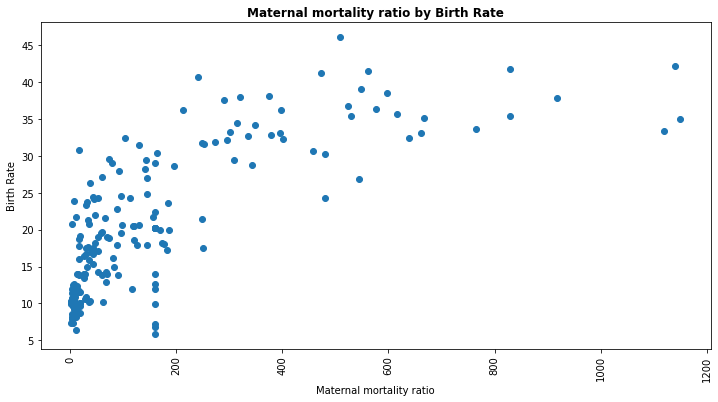

In [ ]:
###Checking for feature that might be linked to birth rate- i.e Maternal mortality rates
mmr_stuff = df[['Maternal mortality ratio', 'Birth Rate']]

plt.figure(figsize=(12, 6))
plt.scatter(df['Maternal mortality ratio'], df['Birth Rate'])
plt.xticks(rotation=90)
plt.xlabel('Maternal mortality ratio')
plt.ylabel('Birth Rate')
plt.title('Maternal mortality ratio by Birth Rate', fontweight='bold')
plt.show()

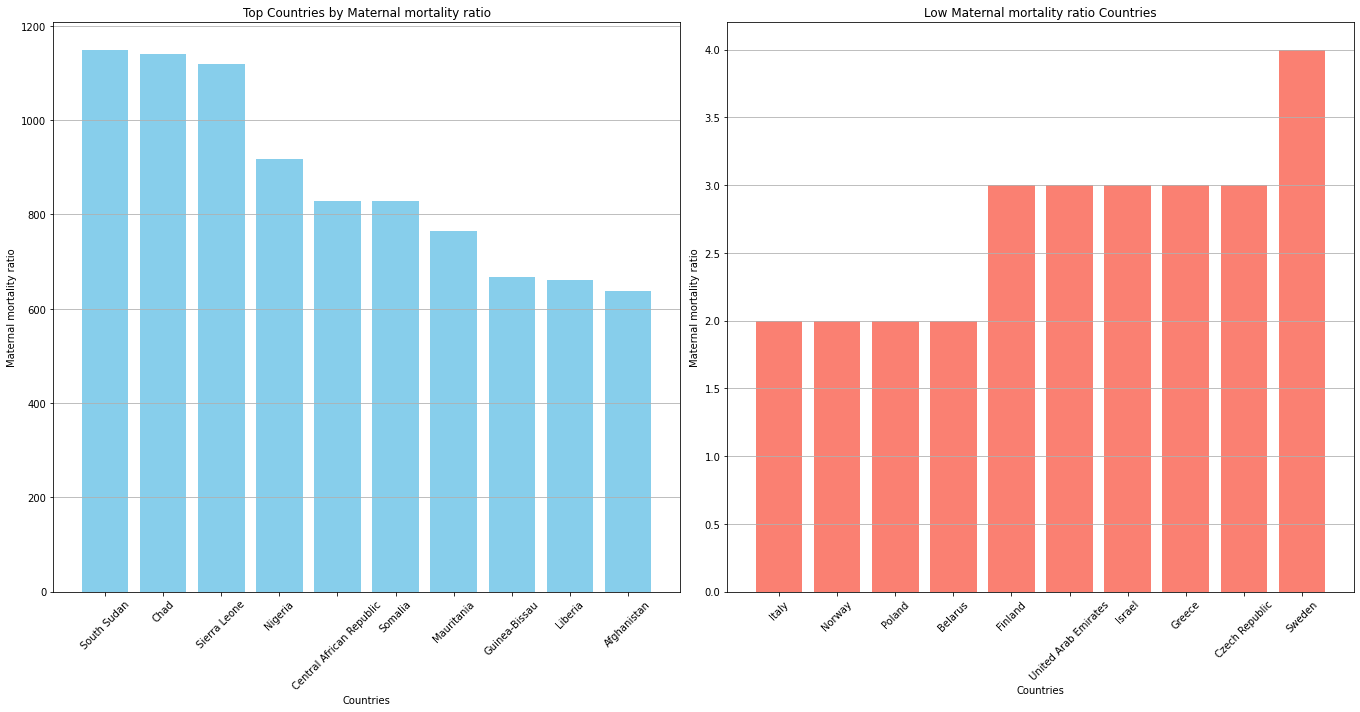

In [ ]:
# Maternal mortality ratio
mmr_high = df.sort_values('Maternal mortality ratio',ascending=False)
mmr_high_countries = mmr_high.head(10)[['Country','Maternal mortality ratio']]

mmr_low = df.sort_values('Maternal mortality ratio',ascending=True)
mmr_low_countries = mmr_low.head(10)[['Country','Maternal mortality ratio']]

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(19, 10))

axis[0].bar(mmr_high_countries['Country'], mmr_high_countries['Maternal mortality ratio'], color='skyblue')
axis[0].set_title('Top Countries by Maternal mortality ratio')
axis[0].set_xlabel('Countries')
axis[0].set_ylabel('Maternal mortality ratio')
axis[0].tick_params(axis='x', rotation=45)
axis[0].grid(axis='y')

axis[1].bar(mmr_low_countries['Country'],mmr_low_countries['Maternal mortality ratio'], color='salmon')
axis[1].set_title('Low Maternal mortality ratio Countries')
axis[1].set_xlabel('Countries')
axis[1].set_ylabel('Maternal mortality ratio')
axis[1].tick_params(axis='x', rotation=45)
axis[1].grid(axis='y')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Physicians per thousand by Birth Rate')

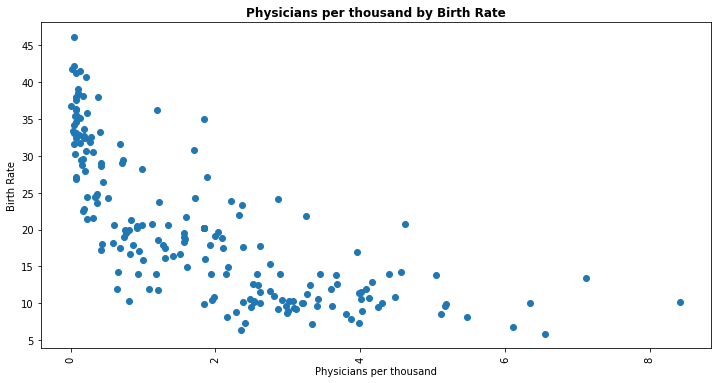

In [ ]:
###Checking for feature that might be linked to birth rate- i.e Physician per thousands
physician_stuff = df[['Physicians per thousand', 'Birth Rate']]

plt.figure(figsize=(12, 6))
plt.scatter(df['Physicians per thousand'], df['Birth Rate'])
plt.xticks(rotation=90)
plt.xlabel('Physicians per thousand')
plt.ylabel('Birth Rate')
plt.title('Physicians per thousand by Birth Rate', fontweight='bold')

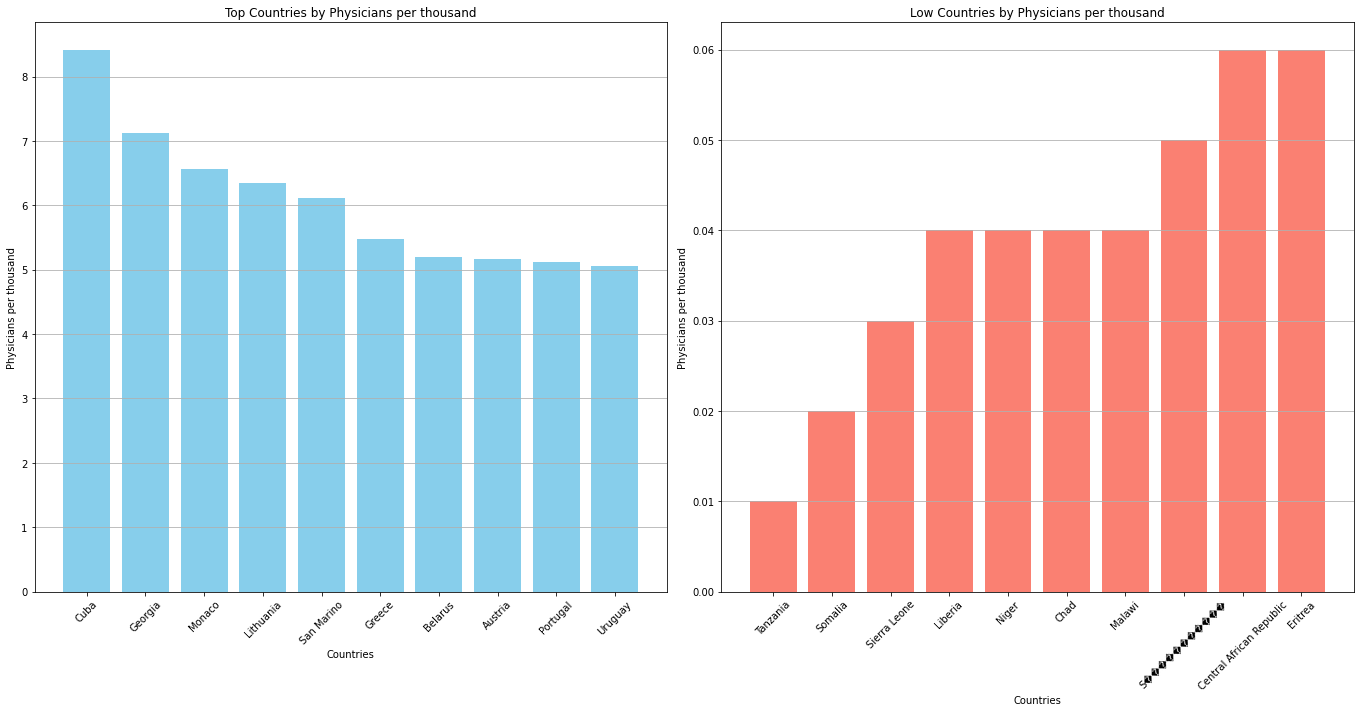

In [ ]:
# Physicians per thousand
physician_high = df.sort_values('Physicians per thousand',ascending=False)
physician_high_countries = physician_high.head(10)[['Country','Physicians per thousand']]

physician_low = df.sort_values('Physicians per thousand',ascending=True)
physician_low_countries = physician_low.head(10)[['Country','Physicians per thousand']]

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(19, 10))

axis[0].bar(physician_high_countries['Country'], physician_high_countries['Physicians per thousand'], color='skyblue')
axis[0].set_title('Top Countries by Physicians per thousand')
axis[0].set_xlabel('Countries')
axis[0].set_ylabel('Physicians per thousand')
axis[0].tick_params(axis='x', rotation=45)
axis[0].grid(axis='y')

axis[1].bar(physician_low_countries['Country'],physician_low_countries['Physicians per thousand'], color='salmon')
axis[1].set_title('Low Countries by Physicians per thousand')
axis[1].set_xlabel('Countries')
axis[1].set_ylabel('Physicians per thousand')
axis[1].tick_params(axis='x', rotation=45)
axis[1].grid(axis='y')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Minimum wage by Birth Rate')

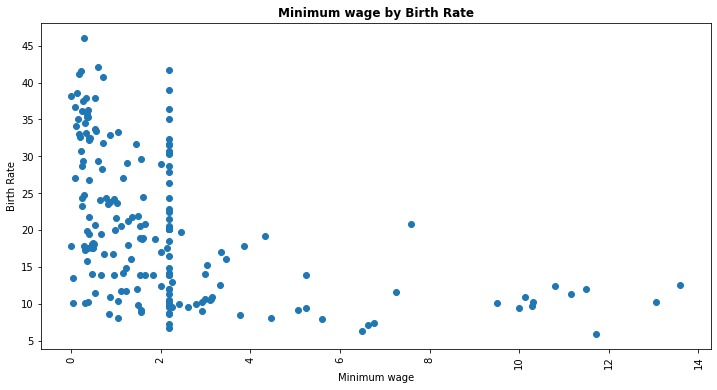

In [ ]:
###Checking for feature that might be linked to birth rate- i.e Maternal mortality rates
wage_stuff = df[['Minimum wage', 'Birth Rate']]

plt.figure(figsize=(12, 6))
plt.scatter(df['Minimum wage'], df['Birth Rate'])
plt.xticks(rotation=90)
plt.xlabel('Minimum wage')
plt.ylabel('Birth Rate')
plt.title('Minimum wage by Birth Rate', fontweight='bold')

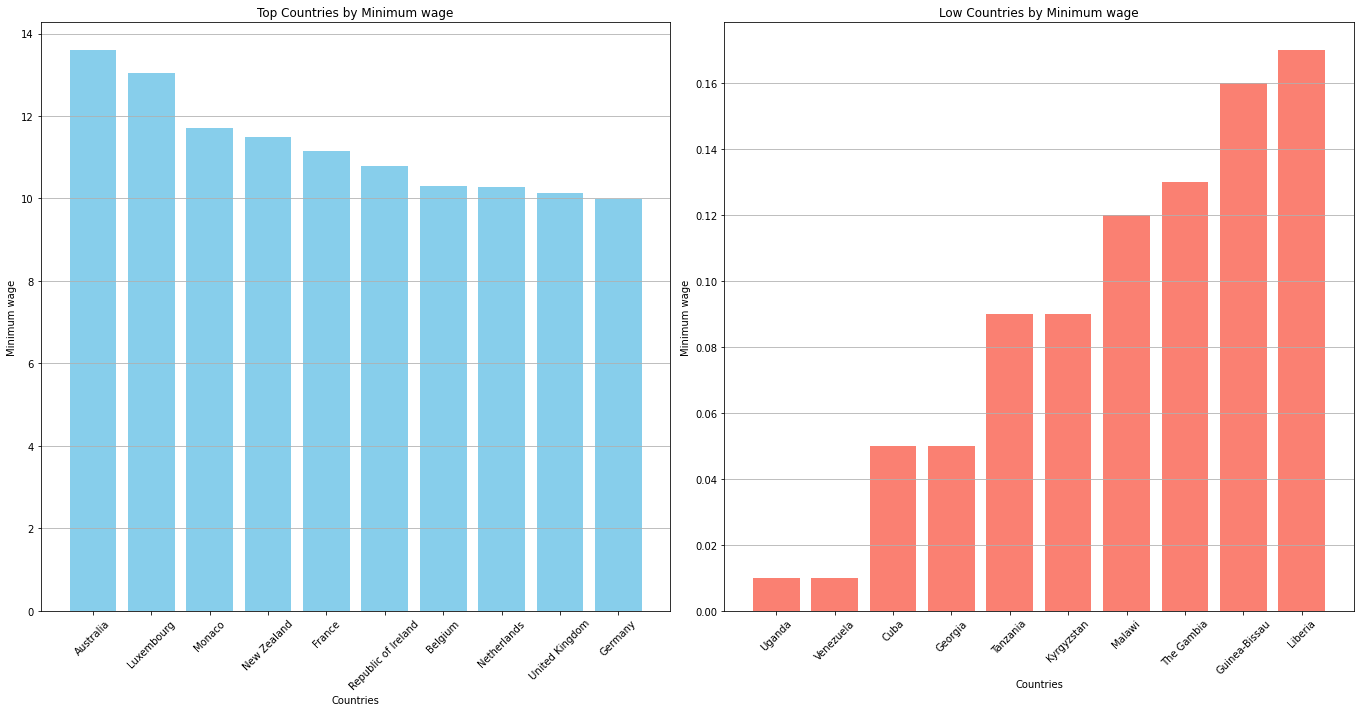

In [ ]:
# Minimum wage
wage_high = df.sort_values('Minimum wage',ascending=False)
wage_high_countries = wage_high.head(10)[['Country','Minimum wage']]

wage_low = df.sort_values('Minimum wage',ascending=True)
wage_low_countries = wage_low.head(10)[['Country','Minimum wage']]

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(19, 10))

axis[0].bar(wage_high_countries['Country'], wage_high_countries['Minimum wage'], color='skyblue')
axis[0].set_title('Top Countries by Minimum wage')
axis[0].set_xlabel('Countries')
axis[0].set_ylabel('Minimum wage')
axis[0].tick_params(axis='x', rotation=45)
axis[0].grid(axis='y')

axis[1].bar(wage_low_countries['Country'],wage_low_countries['Minimum wage'], color='salmon')
axis[1].set_title('Low Countries by Minimum wage')
axis[1].set_xlabel('Countries')
axis[1].set_ylabel('Minimum wage')
axis[1].tick_params(axis='x', rotation=45)
axis[1].grid(axis='y')

plt.tight_layout()
plt.show()

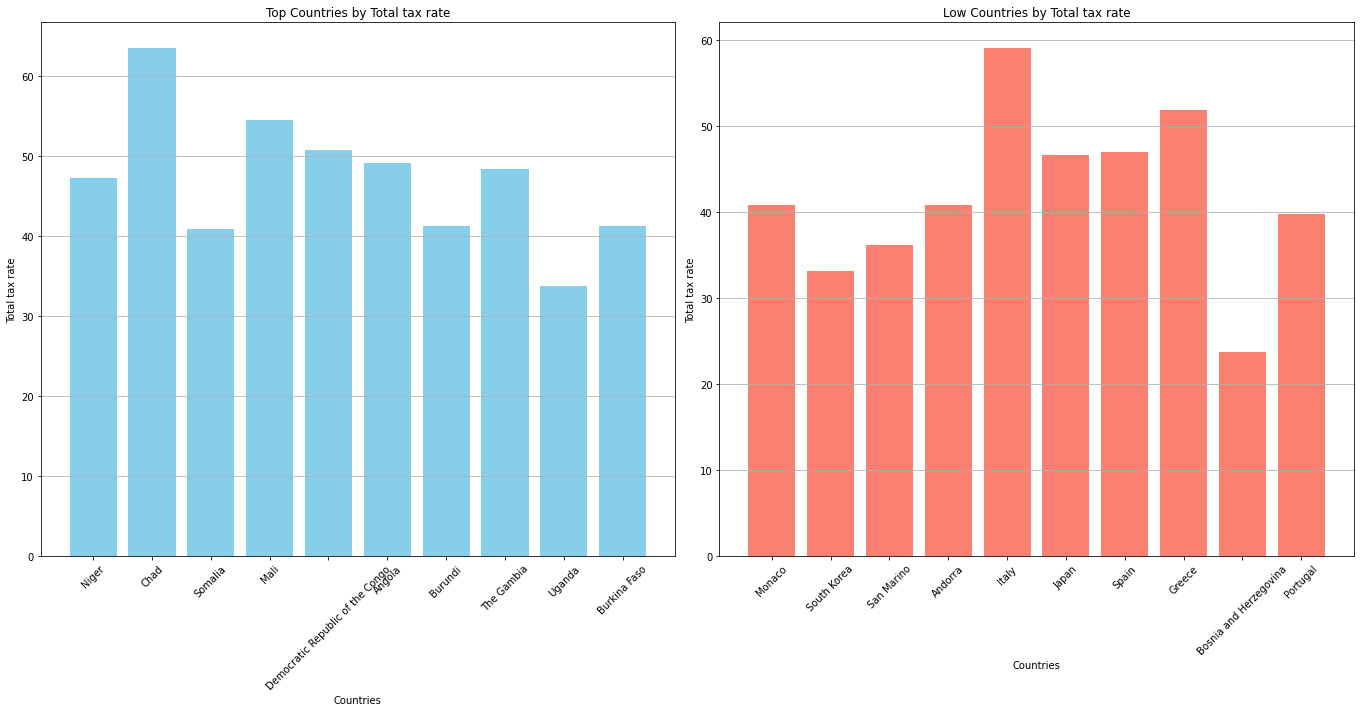

In [ ]:
# Minimum wage
tax_high = df.sort_values('Total tax rate',ascending=False)
tax_high_countries = birth_rate_high.head(10)[['Country','Total tax rate']]

tax_low = df.sort_values('Total tax rate',ascending=True)
tax_low_countries = birth_rate_low.head(10)[['Country','Total tax rate']]

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(19, 10))

axis[0].bar(tax_high_countries['Country'], tax_high_countries['Total tax rate'], color='skyblue')
axis[0].set_title('Top Countries by Total tax rate')
axis[0].set_xlabel('Countries')
axis[0].set_ylabel('Total tax rate')
axis[0].tick_params(axis='x', rotation=45)
axis[0].grid(axis='y')

axis[1].bar(tax_low_countries['Country'],tax_low_countries['Total tax rate'], color='salmon')
axis[1].set_title('Low Countries by Total tax rate')
axis[1].set_xlabel('Countries')
axis[1].set_ylabel('Total tax rate')
axis[1].tick_params(axis='x', rotation=45)
axis[1].grid(axis='y')

plt.tight_layout()
plt.show()

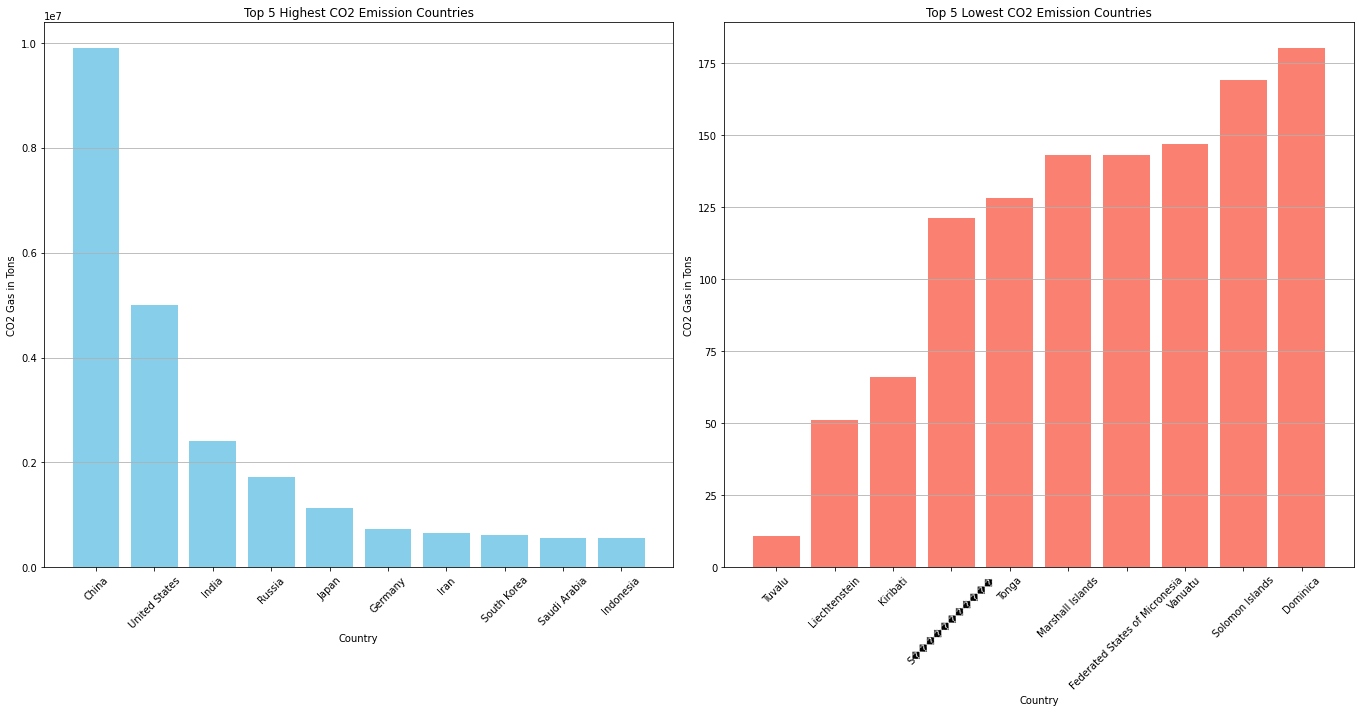

In [ ]:
#displaying c02 emission land insights
low_co2_data = df.sort_values(by='Co2-Emissions', ascending=True)
low_co2 = low_co2_data.head(10)[['Country', 'Co2-Emissions']]

high_co2_data = df.sort_values(by='Co2-Emissions', ascending=False)
high_co2 = high_co2_data.head(10)[['Country', 'Co2-Emissions']]

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(19, 10))

axis[0].bar(high_co2['Country'], high_co2['Co2-Emissions'], color='skyblue')
axis[0].set_title('Top 5 Highest CO2 Emission Countries')
axis[0].set_xlabel('Country')
axis[0].set_ylabel('CO2 Gas in Tons')
axis[0].tick_params(axis='x', rotation=45)
axis[0].grid(axis='y')

axis[1].bar(low_co2['Country'], low_co2['Co2-Emissions'], color='salmon')
axis[1].set_title('Top 5 Lowest CO2 Emission Countries')
axis[1].set_xlabel('Country')
axis[1].set_ylabel('CO2 Gas in Tons')
axis[1].tick_params(axis='x', rotation=45)
axis[1].grid(axis='y')

plt.tight_layout()
plt.show()

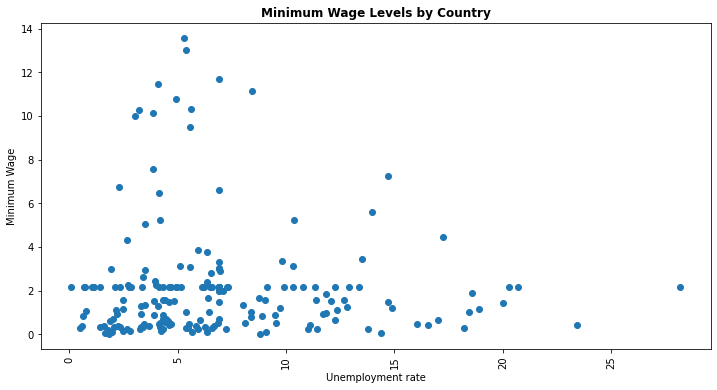

In [ ]:
country_wage = df[['Country', 'Minimum wage']]

plt.figure(figsize=(12, 6))
plt.scatter(df['Unemployment rate'], df['Minimum wage'])
plt.xticks(rotation=90)
plt.xlabel('Unemployment rate')
plt.ylabel('Minimum Wage')
plt.title('Minimum Wage Levels by Country', fontweight='bold')
plt.show()

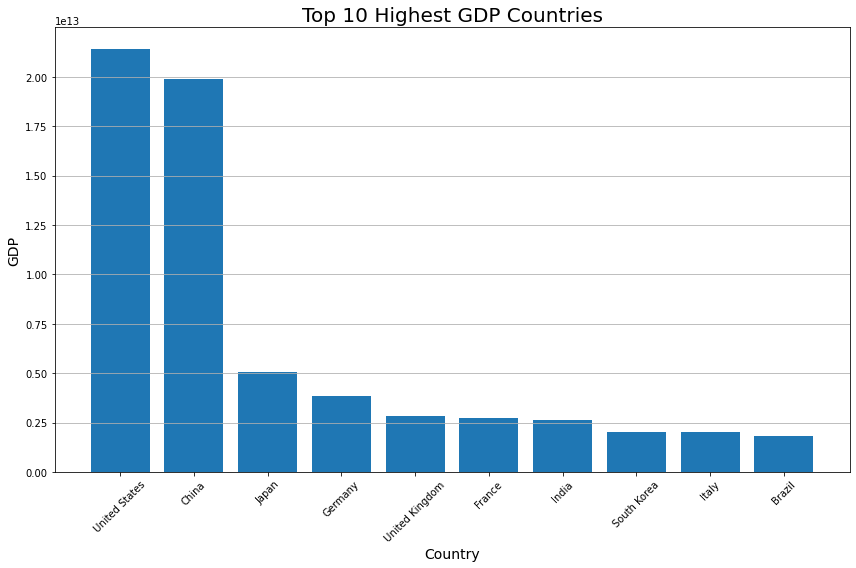

In [ ]:
high_GDP_countries = df.sort_values(by='GDP', ascending=False)[['Country', 'GDP']].head(10)

plt.figure(figsize=(12, 8))
plt.bar(high_GDP_countries['Country'], high_GDP_countries['GDP'])
plt.title('Top 10 Highest GDP Countries', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

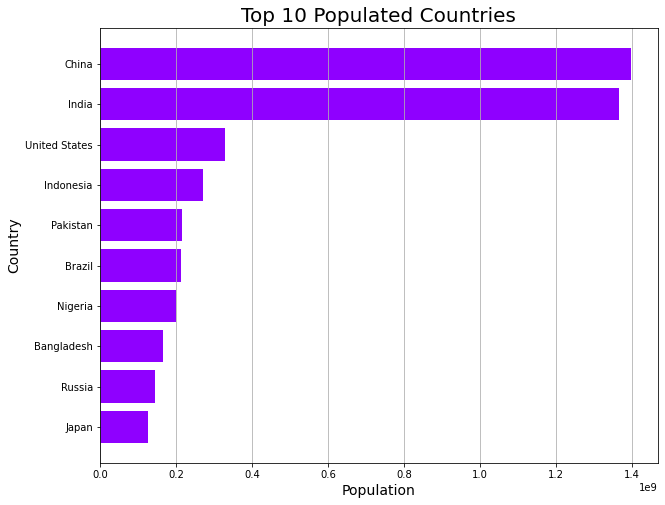

In [ ]:
population = df.sort_values(by='Population', ascending=False)[['Country', 'Population']]
top_populated = population.head(10)

plt.figure(figsize=(10, 8))
plt.barh(top_populated['Country'], top_populated['Population'], color='#8F00FF')
plt.title('Top 10 Populated Countries', fontsize=20)
plt.xlabel('Population', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

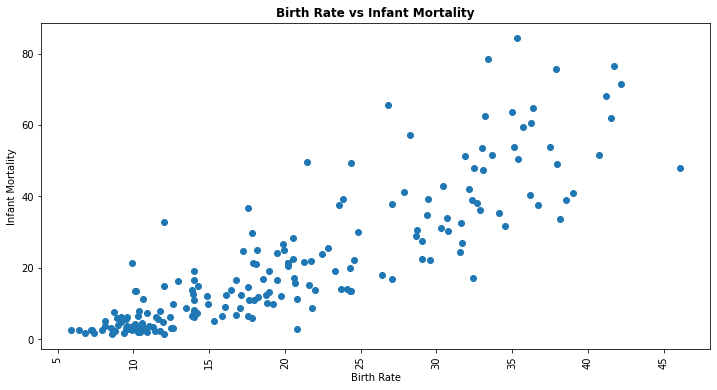

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Birth Rate'], df['Infant mortality'])
plt.xticks(rotation=90)
plt.xlabel('Birth Rate')
plt.ylabel('Infant Mortality')
plt.title('Birth Rate vs Infant Mortality', fontweight='bold')
plt.show()

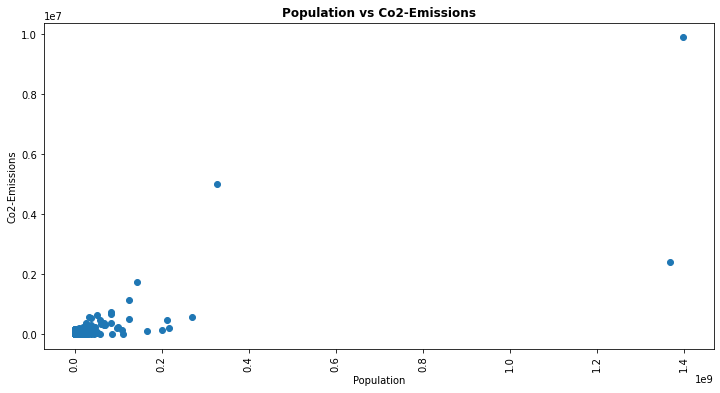

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Population'], df['Co2-Emissions'])
plt.xticks(rotation=90)
plt.xlabel('Population')
plt.ylabel('Co2-Emissions')
plt.title('Population vs Co2-Emissions', fontweight='bold')
plt.show()

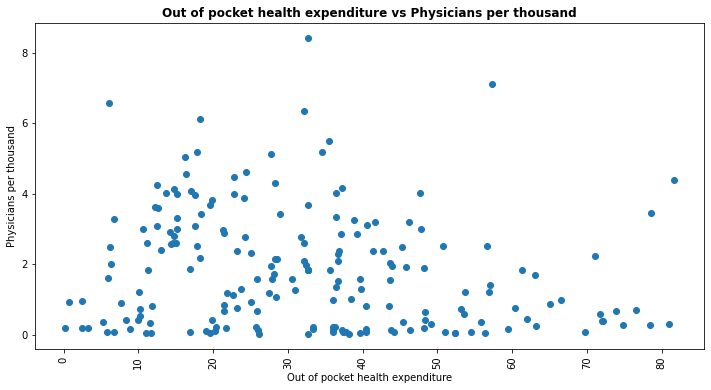

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Out of pocket health expenditure'], df['Physicians per thousand'])
plt.xticks(rotation=90)
plt.xlabel('Out of pocket health expenditure')
plt.ylabel('Physicians per thousand')
plt.title('Out of pocket health expenditure vs Physicians per thousand', fontweight='bold')
plt.show()

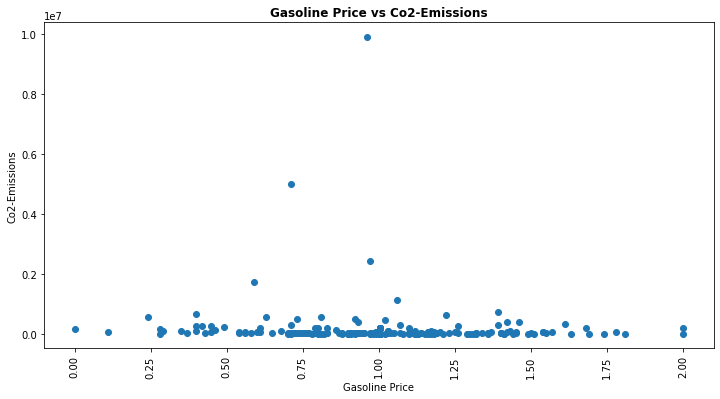

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Gasoline Price'], df['Co2-Emissions'])
plt.xticks(rotation=90)
plt.xlabel('Gasoline Price')
plt.ylabel('Co2-Emissions')
plt.title('Gasoline Price vs Co2-Emissions', fontweight='bold')
plt.show()

## Data Transformation

In [ ]:
df = df.drop('Country', axis=1)

In [ ]:
#robust scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

## Random Forest

Random Forest is picked because it provides a measure of feature importance, allowing to identify the most relevant features for prediction. This helps in feature selection and understanding the underlying data relationships. It also has high accuracy and is robust to overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# splitting the data into features (X) and target (y)
X = df.drop('Birth Rate', axis=1)
y = df['Birth Rate']

# spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#fitting random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
#model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.06658263706807406
Mean Squared Error: 0.007683320920721677
Root Mean Squared Error: 0.08765455447791448
R-squared: 0.968448126892717


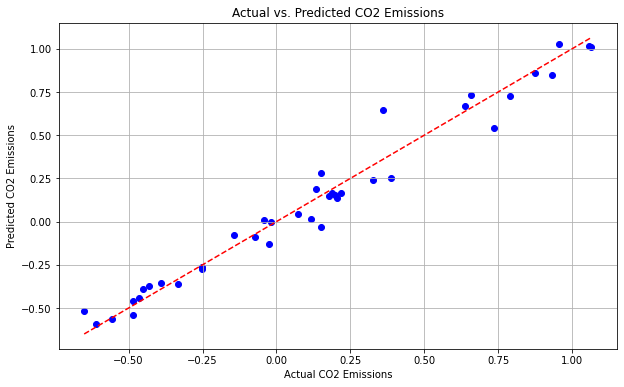

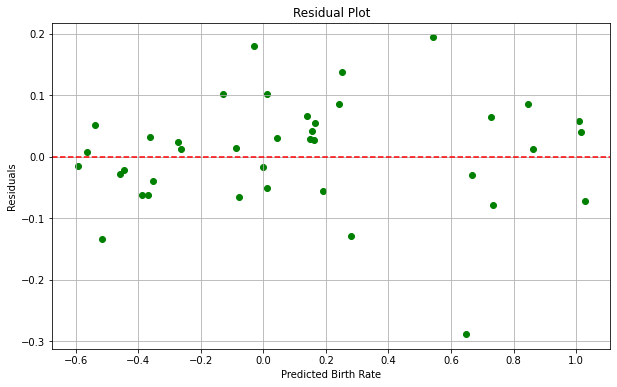

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted Birth Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

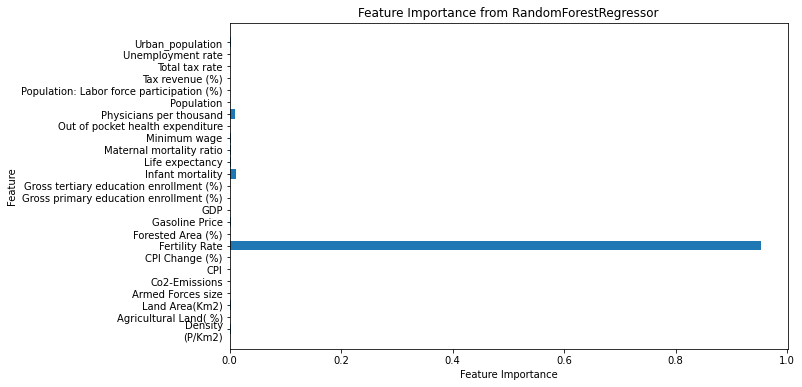

In [ ]:
# visualize feature importances
feature_importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()

In [ ]:
#feature selection for random forest
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator=rf, cv=5)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Density\n(P/Km2)', 'Land Area(Km2)', 'Armed Forces size',
       'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Unemployment rate', 'Urban_population'],
      dtype='object')


## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#model evaluation - XGboost
y_pred_xg = xg_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_xg)
mse = mean_squared_error(y_test, y_pred_xg)
rmse = mean_squared_error(y_test, y_pred_xg, squared=False)
r2 = r2_score(y_test, y_pred_xg)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.07190770913192605
Mean Squared Error (MSE): 0.009706350551778441
Root Mean Squared Error (RMSE): 0.09852081278480421
R-squared (R2): 0.9601404725763096


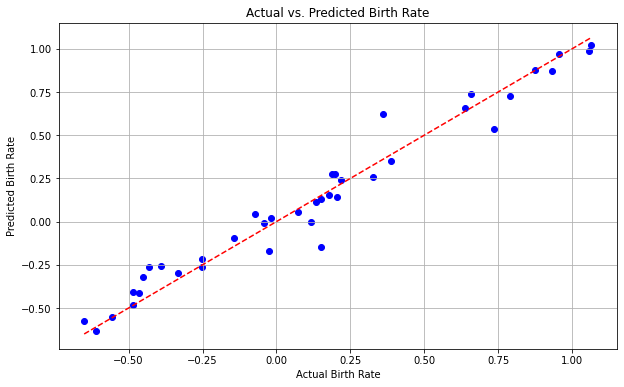

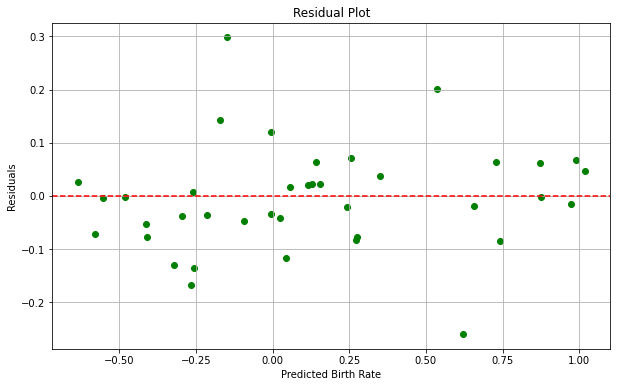

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xg, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Birth Rate')
plt.ylabel('Predicted Birth Rate')
plt.title('Actual vs. Predicted Birth Rate')
plt.grid(True)
plt.show()

# Residual plot
residuals_xg = y_test - y_pred_xg
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xg, residuals_xg, color='green')
plt.xlabel('Predicted Birth Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

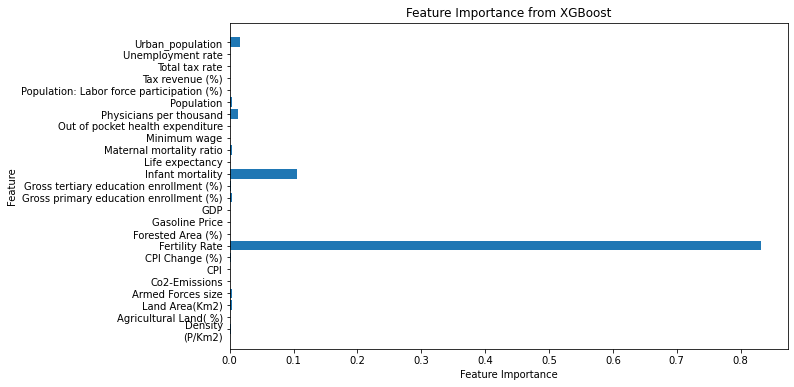

In [ ]:
# Visualize feature importances
feature_importances = xg_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.show()

In [ ]:
#feature selection
num_top_features = 10
top_feature_indices = feature_importances.argsort()[-num_top_features:][::-1]
top_features = X.columns[top_feature_indices]

print("Top Features:", top_features)

Top Features: Index(['Fertility Rate', 'Infant mortality', 'Urban_population',
       'Physicians per thousand', 'Land Area(Km2)', 'Population',
       'Maternal mortality ratio', 'Armed Forces size',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)'],
      dtype='object')


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

In [ ]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Evaluation:")
print("Mean Absolute Error (MAE):", mae_linear)
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("R-squared (R2):", r2_linear)

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.08751471537250345
Mean Squared Error (MSE): 0.012541968543196504
Root Mean Squared Error (RMSE): 0.1119909306292099
R-squared (R2): 0.9484958907647318


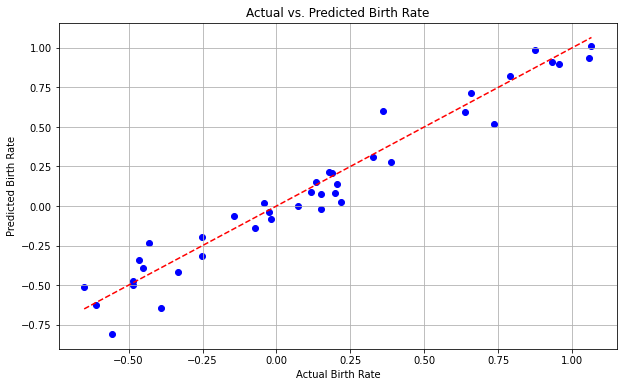

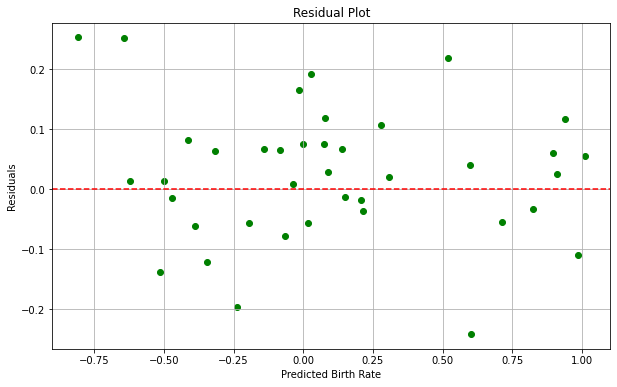

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Birth Rate')
plt.ylabel('Predicted Birth Rate')
plt.title('Actual vs. Predicted Birth Rate')
plt.grid(True)
plt.show()

residuals = y_test - y_pred_linear
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, color='green')
plt.xlabel('Predicted Birth Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
coefficients = linear_reg.coef_

for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

Density
(P/Km2): -0.004143225763926397
Agricultural Land( %): 0.03384092898239629
Land Area(Km2): 0.0016585523706163616
Armed Forces size: -0.005994349277269201
Co2-Emissions: 0.0051479859005184895
CPI: 0.0003017810482745044
CPI Change (%): 0.0020554236528786303
Fertility Rate: 0.7136154037386119
Forested Area (%): -0.009602700621632466
Gasoline Price: -0.013272186804044014
GDP: -0.00655102767267611
Gross primary education enrollment (%): 0.017377218785942845
Gross tertiary education enrollment (%): -0.04551804434970279
Infant mortality: 0.02184505727660009
Life expectancy: -0.030932085305917588
Maternal mortality ratio: -0.0194218842868924
Minimum wage: -0.003654860592388762
Out of pocket health expenditure: 0.029665771659599053
Physicians per thousand: -0.07917795716901865
Population: -0.004090194459385552
Population: Labor force participation (%): 0.013206211493649396
Tax revenue (%): 0.008939631578931025
Total tax rate: -0.0019492464560742844
Unemployment rate: 0.001502954801129908

## KNN

In [ ]:
import numpy as np

num_instances = X_train.shape[0]
sqrt_num_instances = np.sqrt(num_instances)

k = int(np.round(sqrt_num_instances))

print("Square root of the number of instances:", sqrt_num_instances)
print("Rounded value of k:", k)

Square root of the number of instances: 12.489995996796797
Rounded value of k: 12


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

selected_features = ['Fertility Rate', 'Infant mortality', 'Maternal mortality ratio',
                     'Life expectancy', 'Gross tertiary education enrollment (%)',
                     'Physicians per thousand', 'Minimum wage']

X = df[selected_features]
y = df['Birth Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#scaled
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
num_instances = X_train_scaled.shape[0]
sqrt_num_instances = np.sqrt(num_instances)
k = int(np.round(sqrt_num_instances))

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.17905361368249223


In [ ]:
#model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.14373193229719655
Mean Squared Error: 0.03206019657275917
Root Mean Squared Error: 0.17905361368249223
R-squared: 0.9162737322732969


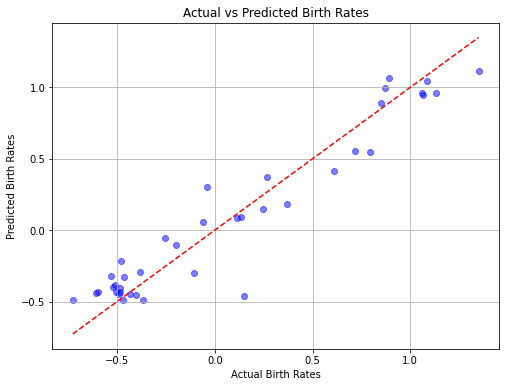

In [ ]:
#plotting figure

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Birth Rates')
plt.xlabel('Actual Birth Rates')
plt.ylabel('Predicted Birth Rates')
plt.grid(True)
plt.show()

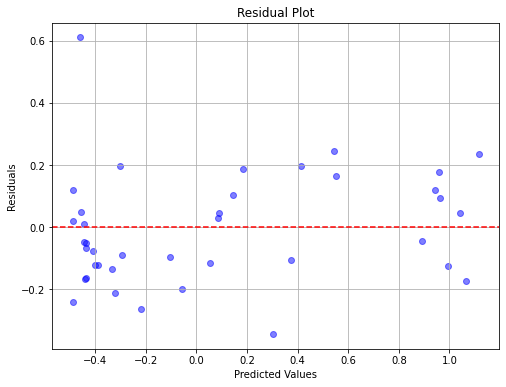

In [ ]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()